# Analyse de similarité

In [80]:
%matplotlib inline
import numpy as np
from sklearn.covariance import GraphLassoCV, LedoitWolf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt


def rsa_corr(X,y):
    estimator = LedoitWolf()
    scaler=StandardScaler()
    labels=np.unique(y)
    nf=X.shape[1]
    matrix={}
    cov_matrix_all=np.zeros((len(labels)*nf,len(labels)*nf))
    for i,i_label in enumerate(sorted(labels)):
        matrix[i]={}
        for j,j_label in enumerate(sorted(labels)):
            X_cond=X[np.logical_or(y==i_label,y==j_label)]           
            X_cond_scale=scaler.fit_transform(X_cond)   
            estimator.fit(X_cond_scale)
            ni=i*nf
            nj=j*nf
           # print(X_cond.shape[0],i_label,j_label,i,j,ni,ni+nf,nj,nj+nf)
            cov_matrix_all[ni:ni+nf,nj:nj+nf]=estimator.covariance_ 
            matrix[i][j]=estimator.covariance_ 
    return cov_matrix_all,matrix


def plot_matrices(matrix,y):
    label=sorted(np.unique(y))
    nf=int(matrix.shape[0]/len(label))
    fig, ax = plt.subplots(1)
    im=ax.imshow(matrix, cmap='RdBu_r')
    plt.colorbar(im)
    ax.set_yticks(range(0,matrix.shape[0],nf))
    ax.set_yticklabels(label)
    ax.set_xticks(range(0,matrix.shape[0],nf))
    ax.set_xticklabels(label)
    plt.tight_layout()
    plt.title(n)
    plt.show()

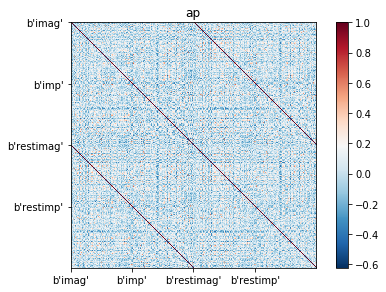

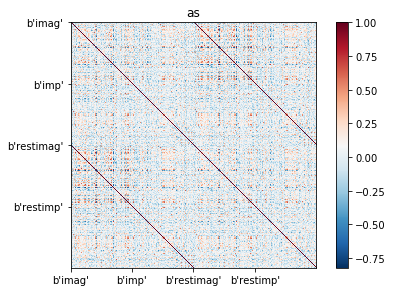

In [81]:
fold='F:/IRM_marche/all_mni_imp_imag/'
smt='ss'       
names=('ap','as','bh','bi','boh','cmp','cas','cs','cb','gm','gn','gbn','mv',
       'ms','pm','pc','ph','pa','pv','pom','rdc','ti','vs',
       'an','bm','cc','ci','cjf','dm','fb','fm','gem','gmc','hnc','lm','mac',
       'marc','marm','om','pic','pr','qs','ris','sn','tj','va',
       'af','ba','be','br','ds','ea','fj','gc','gv','hc','hn',
       'lbc','lc','lp','my','mc','pj','pf','rs','wl',#'dc',     
      )
names=('ap','as')
label=np.loadtxt(fold+'label.txt','S12')

for i,n in enumerate(sorted(names)):
    roi_name=fold+'asymroi_'+smt+'_'+n+'.npz'              
    roi=np.load(roi_name)['roi']
    cov_matrix,matrix=rsa_corr(roi,label)
    plot_matrices(cov_matrix,label)


0


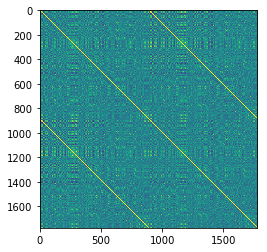

In [100]:
# Verif
matrix_0=np.hstack((matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3]))
matrix_1=np.hstack((matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3]))
matrix_2=np.hstack((matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3]))
matrix_3=np.hstack((matrix[3][0],matrix[3][1],matrix[3][2],matrix[3][3]))
matrix_final=np.vstack((matrix_0,matrix_1,matrix_2,matrix_3))

print((matrix_final!=cov_matrix).sum())
plt.imshow(matrix_final)